# 0-Imports and Reading Data

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import warnings as wr
import scipy
import plotly.graph_objects as go
wr.filterwarnings("ignore") #to ignore the warnings

In [2]:
df_raw= pd.read_csv(r"C:\Users\T2ABIZZ\Documents\Datasets\IT_SALARY_SURVEY\IT_Salary_Survey_EU _2020.csv")
df=df_raw.copy()



# 1-Data understanding

In [3]:
df.shape

(1253, 23)

In [4]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [5]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [6]:
df.dtypes

Timestamp                                                                                                                   object
Age                                                                                                                        float64
Gender                                                                                                                      object
City                                                                                                                        object
Position                                                                                                                    object
Total years of experience                                                                                                   object
Years of experience in Germany                                                                                              object
Seniority level                                                                    

# 2-Data Preperation

In [7]:
df = df_raw.replace(',', '.', regex=True)

In [8]:
df=df[[
       # 'Timestamp',
       'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       # 'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       # 'Yearly bonus + stocks in EUR',
       # 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       # 'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       # 'Have you lost your job due to the coronavirus outbreak?',
       # 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       # 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'
]].copy()

In [9]:

df = df.rename(columns={"Position ": "Position",
                    "Total years of experience":"Total_years_of_experience",
                    "Years of experience in Germany":"Years_of_experience_in_Germany",
                    "Seniority level":"Seniority_level",
                    "Your main technology / programming language":"Programming_language",
                    "Yearly brutto salary (without bonus and stocks) in EUR" : "Salary",
                    "Number of vacation days" : "Vacation",
                    "Employment status":"Employment_status",
                    "Сontract duration":"Contract_duration",
                    "Main language at work":"Language",
                    "Company size":"Company_size",
                    "Company type":"Company_type"
                    })


In [10]:
df.head()

,Age,Gender,City,Position,Total_years_of_experience,Years_of_experience_in_Germany,Seniority_level,Programming_language,Salary,Vacation,Employment_status,Contract_duration,Language,Company_size,Company_type
0,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,80000.0,30,Full-time employee,Unlimited contract,English,51-100,Product
1,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,80000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product
2,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,120000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,54000.0,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,62000.0,29,Full-time employee,Unlimited contract,English,101-1000,Product


as we can see there is columns that is object and should be float, So we must convert them.

In [11]:
df.loc[(df['Total_years_of_experience']=='1 (as QA Engineer) / 11 in total'),'Total_years_of_experience']=1
df.loc[(df['Total_years_of_experience']=='6 (not as a data scientist. but as a lab scientist)'),'Total_years_of_experience']=6
df.loc[(df['Total_years_of_experience']=='15. thereof 8 as CTO'),'Total_years_of_experience']=15
df.loc[(df['Total_years_of_experience']=='less than year'),'Total_years_of_experience']=0
df.loc[(df["Employment_status"]=="Company Director") |
       (df["Employment_status"]=="Founder") |
       (df["Employment_status"]=="full-time. but 32 hours per week (it was my request. I'm a student)")
       ,"Employment_status"]="Full-time employee"

df.loc[(df["Employment_status"]=="working student") |
       (df["Employment_status"]=="Working Student") |
       (df["Employment_status"]=="Full-time position. part-time position. & self-employed (freelancing. tutoring)")|
       (df["Employment_status"]=="Werkstudent") 
       ,"Employment_status"]="Part-time employee"

df.loc[(df["Vacation"]=="unlimited")| 
       (df["Vacation"]=="Unlimited")|
       (df["Vacation"]=="unlimited ")|
       (df["Vacation"]=="Unlimited ")|

       (df["Vacation"]=="unlimited")|
       (df["Vacation"]=="(no idea)")|
       (df["Vacation"]=="30 in contract (but theoretically unlimited)")
       ,"Vacation"]=30

df.loc[(df["Vacation"]=="24 labour days"),"Vacation"]=24
df.loc[(df["Vacation"]=="23+"),"Vacation"]=23
df.loc[(df["Vacation"]=="~25"),"Vacation"]=25



df['Total_years_of_experience'].fillna(df['Years_of_experience_in_Germany'], inplace=True)
df['Years_of_experience_in_Germany'].fillna(df['Total_years_of_experience'], inplace=True)

In [12]:
a = pd.to_numeric(df["Years_of_experience_in_Germany"], errors='coerce')
idx = a.isna()
df.loc[idx, 'Years_of_experience_in_Germany'] = df.loc[idx, 'Total_years_of_experience']
# df[idx] 


In [13]:

df = df.astype({
    "Total_years_of_experience":"float64",
    "Years_of_experience_in_Germany":"float64",
    "Salary":"float64",
    "Language":'category',
    "Vacation":"float64"

 })

In [14]:
df.head()

,Age,Gender,City,Position,Total_years_of_experience,Years_of_experience_in_Germany,Seniority_level,Programming_language,Salary,Vacation,Employment_status,Contract_duration,Language,Company_size,Company_type
0,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,80000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product
1,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,Ruby,80000.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product
2,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,Javascript,54000.0,24.0,Full-time employee,Unlimited contract,English,51-100,Startup
4,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,62000.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product


In [15]:
numerical_feautures=df.select_dtypes(include=[np.number])
numerical_feautures.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1226.0,3.250979e+01,5.663804e+00,20.0,29.0,32.0,35.0,6.900000e+01
Total_years_of_experience,1247.0,9.038172e+00,1.185861e+01,0.0,5.0,8.0,12.0,3.830000e+02
Years_of_experience_in_Germany,1247.0,3.817562e+00,3.730597e+00,0.0,1.0,3.0,5.0,3.000000e+01
Salary,1253.0,8.027904e+07,2.825061e+09,10001.0,58800.0,70000.0,80000.0,1.000000e+11
Vacation,1185.0,2.835148e+01,1.070413e+01,0.0,27.0,28.0,30.0,3.650000e+02


as we can see there is some outliers in Yearly brutto salary , Let's drop it!

In [16]:
Q1 = np.percentile(df['Salary'], 25, method='midpoint')
Q3 = np.percentile(df['Salary'], 75, method='midpoint')
IQR = Q3 - Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
upper_array = np.where(df['Salary']>=upper)[0]
lower_array = np.where(df['Salary']<=lower)[0]
print(IQR)
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

21200.0


In [17]:
df.dropna(subset=["Total_years_of_experience","Years_of_experience_in_Germany"],how="all",inplace=True)

### Observation
- Age varies from 20 to 66 and the mean age is 32
- 

In [18]:
df.duplicated().sum()

16

In [19]:
# df['Age'].describe()

In [20]:
# 

# 3-Feature Understanding

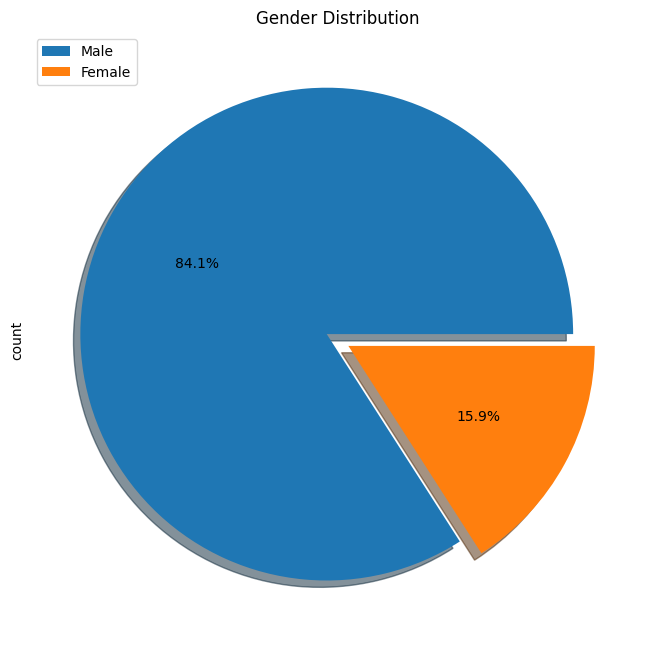

In [21]:
df["Gender"].value_counts().plot.pie(explode=[ 0.05,0.05], autopct='%1.1f%%',labels=['','',''], shadow=True, figsize=(8,8))
plt.title('Gender Distribution')
plt.legend(loc='upper left',labels=df['Gender'].value_counts().index)
plt.show()

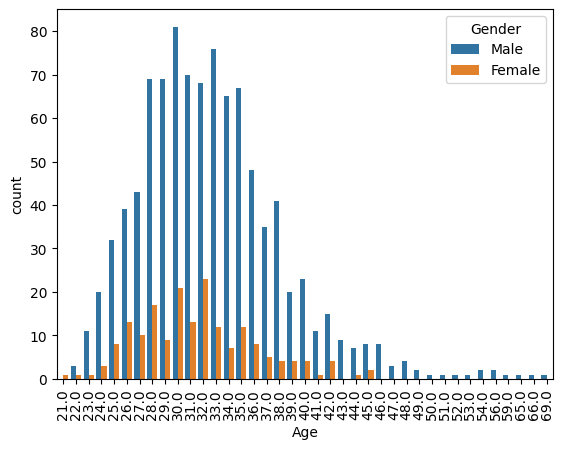

In [22]:
ax = sns.countplot(x="Age",data=df,hue="Gender")
a=ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


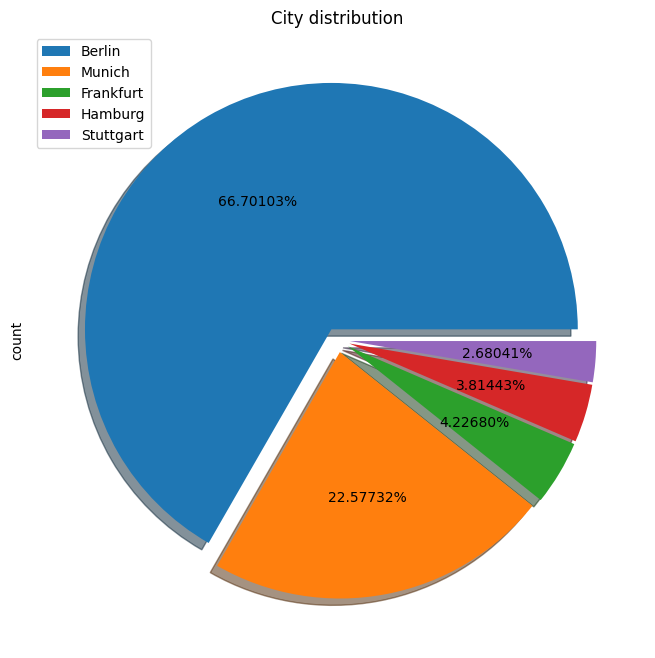

In [23]:
df["City"].value_counts().iloc[:5].plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05],autopct='%1.5f%%',shadow=True,labels=['']*5, figsize=(8,8))
plt.title('City distribution')
plt.legend(loc='upper left',labels=df['City'].value_counts().iloc[:5].index)
plt.show()

Text(0.5, 1.0, 'Top 5 Job Positions')

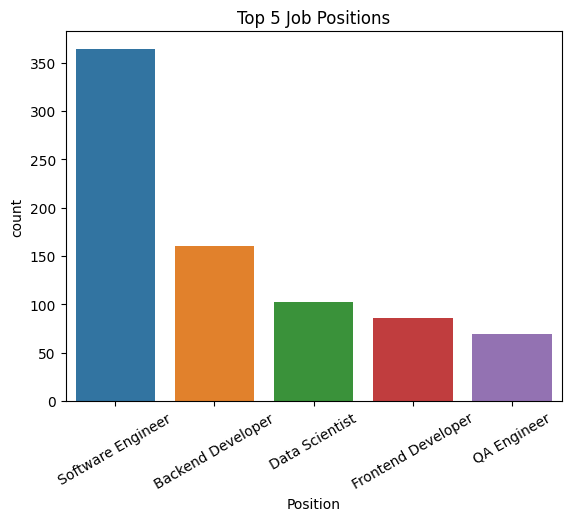

In [24]:
ax = sns.countplot(x=df["Position"],order=df.Position.value_counts().iloc[:5].index)
a=ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Top 5 Job Positions")

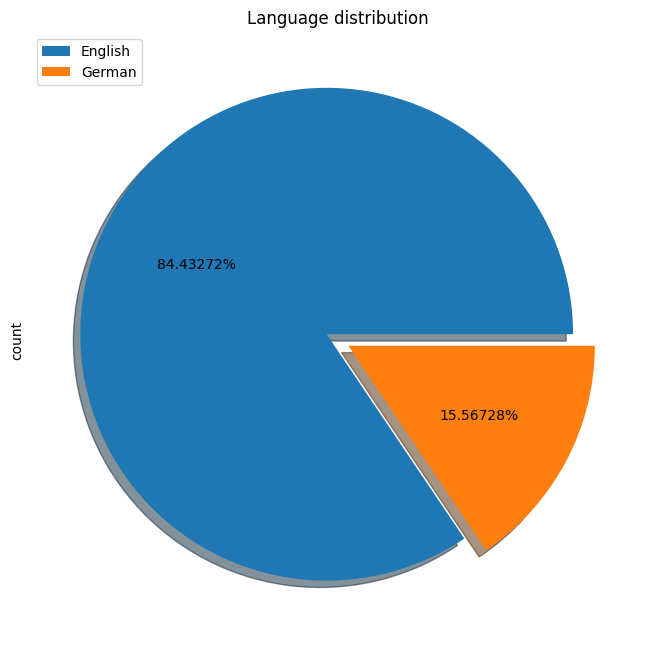

In [25]:
df["Language"].value_counts().iloc[:2].plot.pie(explode=[0.05,0.05],autopct='%1.5f%%',shadow=True,labels=['']*2, figsize=(8,8))
plt.title('Language distribution')
plt.legend(loc='upper left',labels=df['Language'].value_counts().iloc[:2].index)
plt.show()

In [26]:
dataset= [df["Salary"]]
label=["Salary in euro"]
fig = ff.create_distplot(dataset, label, show_hist = False)
fig.update_layout(title = 'Distribution Plot of Salary in USD') 
fig.show()

In [27]:
df['Seniority_level'].value_counts()



Seniority_level
Senior                                       546
Middle                                       349
Lead                                         145
Junior                                        70
Head                                          35
Principal                                      3
No level                                       1
VP                                             1
Manager                                        1
Work Center Manager                            1
No level                                       1
Director                                       1
Key                                            1
no idea. there are no ranges in the firm       1
Entry level                                    1
Intern                                         1
Name: count, dtype: int64

In [28]:
top_l=df.loc[(df["Seniority_level"]=="Senior")
             | (df["Seniority_level"]=="Middle") 
             | (df["Seniority_level"]=="Lead") | 
            (df["Seniority_level"]=="Junior") | 
(df["Seniority_level"]=="Head")]

In [29]:
sen_lev=top_l["Seniority_level"].value_counts()
fig = px.treemap(sen_lev,path=[sen_lev.index],values=sen_lev.values,title="Seniority_level")
fig.show()

# Relationships

In [30]:
df_corr=df[['Age', 'Total_years_of_experience',
       'Years_of_experience_in_Germany', 
        'Salary', 'Vacation']].dropna().corr()

<Axes: >

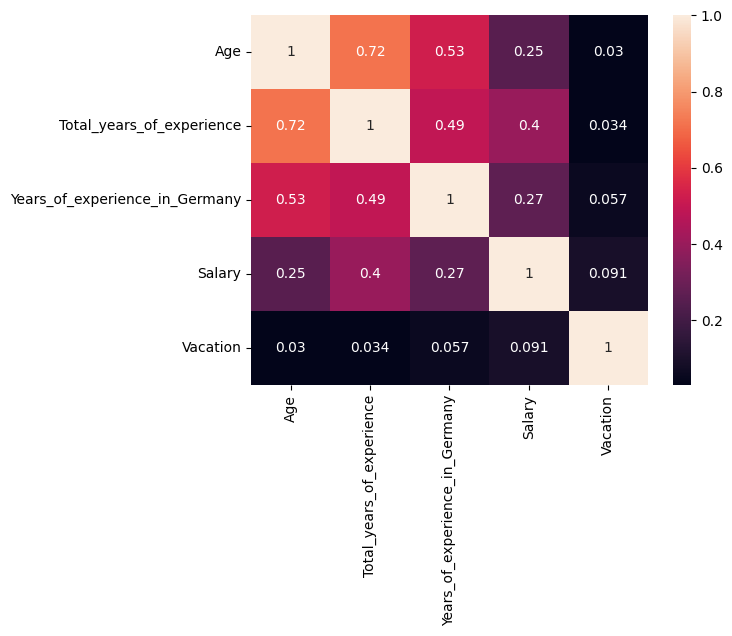

In [41]:
sns.heatmap(df_corr, annot=True)


In [32]:
df["Position"].value_counts().iloc[:5].sort_values(ascending=False)

Position
Software Engineer     364
Backend Developer     160
Data Scientist        102
Frontend Developer     86
QA Engineer            69
Name: count, dtype: int64

In [33]:
top_p=df.loc[(df["Position"]=="Software Engineer")
             | (df["Position"]=="Backend Developer") 
             | (df["Position"]=="Data Scientist") | 
            (df["Position"]=="Frontend Developer") | 
(df["Position"]=="QA Engineer")]

In [34]:

city=top_p[['City','Position']].value_counts()
city.to_csv('city_p.csv')
city=pd.read_csv('city_p.csv')
city.rename(columns={'0':'count'},inplace=True)
px.bar(city,x="City",y="count",color="Position")

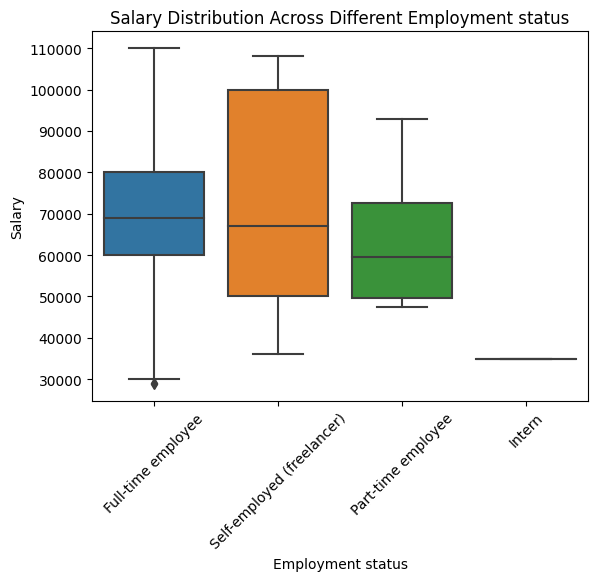

In [35]:

ax=sns.boxplot(data=df,y="Salary",x="Employment_status")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Salary Distribution Across Different Employment status')
plt.xlabel('Employment status')
plt.ylabel('Salary')
plt.show()


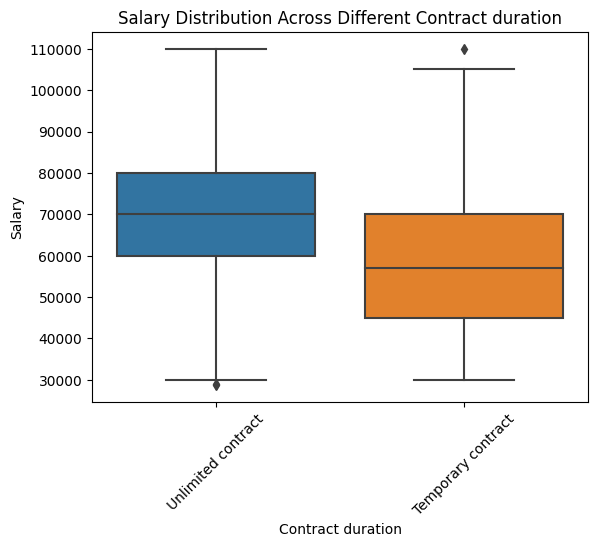

In [36]:

ax=sns.boxplot(data=df,y="Salary",x="Contract_duration")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Salary Distribution Across Different Сontract duration')
plt.xlabel('Сontract duration')
plt.ylabel('Salary')
plt.show()

In [37]:
fig=px.scatter(top_p,x="Total_years_of_experience",y="Salary",trendline="ols",color="Gender")
fig.show()

In [38]:
df["Seniority_level"].value_counts()

Seniority_level
Senior                                       546
Middle                                       349
Lead                                         145
Junior                                        70
Head                                          35
Principal                                      3
No level                                       1
VP                                             1
Manager                                        1
Work Center Manager                            1
No level                                       1
Director                                       1
Key                                            1
no idea. there are no ranges in the firm       1
Entry level                                    1
Intern                                         1
Name: count, dtype: int64

In [39]:
Seniority_salary=df[["Seniority_level","Salary"]]
Junior_salary=df.loc[Seniority_salary["Seniority_level"]=="Junior"]
Middle_salary=df.loc[Seniority_salary["Seniority_level"]=="Middle"]
Senior_salary=df.loc[Seniority_salary["Seniority_level"]=="Senior"]
Lead_salary=df.loc[Seniority_salary["Seniority_level"]=="Lead"]
Head_salary=df.loc[Seniority_salary["Seniority_level"]=="Head"]
labels=["Junior","Middle","Senior","Lead","Head"]
data=[Junior_salary["Salary"],Middle_salary["Salary"],Senior_salary["Salary"],Lead_salary["Salary"],Head_salary["Salary"]]

mean=[Junior_salary["Salary"].mean()
      ,Middle_salary["Salary"].mean()
      ,Senior_salary["Salary"].mean()
      ,Lead_salary["Salary"].mean()
      ,Head_salary["Salary"].mean()
      ]

fig1= ff.create_distplot(data,labels,show_hist=False)
fig2 = go.Figure(data=px.bar(x=labels,
                             y=mean,
                             title="Mean salary by Seniority level",
                             text=mean))
fig2.update_layout(
    xaxis_title="Seniority Level",
    yaxis_title="Mean Salary ",
)
fig1.show()
fig2.show()

In [40]:
df["Company_size"].value_counts()

Company_size
1000+       412
101-1000    391
11-50       163
51-100      139
up to 10     51
Name: count, dtype: int64

In [44]:
Size_salary=df[["Company_size","Salary"]]
Small_salary=df.loc[Size_salary["Company_size"]=="up to 10"]
Mid_salary=df.loc[Size_salary["Company_size"]=="11-50"]
Large_salary=df.loc[Size_salary["Company_size"]=="51-100"]
Extra_salary=df.loc[Size_salary["Company_size"]=="101-1000"]
ExtraExtra_salary=df.loc[Size_salary["Company_size"]=="1000+"]
labels=["up to 10","11-50","51-100","101-1000","1000+"]
data=[Small_salary["Salary"],Mid_salary["Salary"],Large_salary["Salary"],Extra_salary["Salary"],ExtraExtra_salary["Salary"]]

mean=[Small_salary["Salary"].mean()
      ,Mid_salary["Salary"].mean()
      ,Large_salary["Salary"].mean()
      ,Extra_salary["Salary"].mean()
      ,ExtraExtra_salary["Salary"].mean()
      ]

fig1= ff.create_distplot(data,labels,show_hist=False)
fig2 = go.Figure(data=px.bar(x=labels,
                             y=mean,
                             title="Mean salary by Company Size",
                             text=mean))
fig2.update_layout(
    xaxis_title="Company Size",
    yaxis_title="Mean Salary ",
)
fig1.show()
fig2.show()